# Load the necessary libraries

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import pandas as pd

# Configure logging
logging.basicConfig(filename='../logs/',
                    level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')
  

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from load_csv_data import Load_CSV_Data


# Load the data set

In [2]:
df = Load_CSV_Data('../data/Copy of BrentOilPrices.csv')
df.load_csv_data()
df = df.get_data()

Data successfully loaded from ../data/Copy of BrentOilPrices.csv


In [3]:
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


# Preprocess Data

In [4]:
def preprocess_data(data: pd.DataFrame) -> pd.DataFrame:
    """
    Preprocesses the data by parsing dates, sorting, handling missing values, and removing outliers.
    Parameters:
        data (pd.DataFrame): The raw data.
    Returns:
        pd.DataFrame: The cleaned data.
    """
    # Convert the date column to datetime format with specified date format
    data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%y', errors='coerce')
    # Drop rows with missing dates
    data = data.dropna(subset=['Date'])
    # Sort by date
    data = data.sort_values(by='Date').reset_index(drop=True)
    
    # Handle missing values in the Price column (use forward-fill as an example)
    data['Price'] = data['Price'].fillna(method='ffill')

    # Optionally, remove outliers in the Price column (customize threshold as needed)
    Q1 = data['Price'].quantile(0.25)
    Q3 = data['Price'].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data['Price'] >= (Q1 - 1.5 * IQR)) & (data['Price'] <= (Q3 + 1.5 * IQR))]

    print("Data preprocessed successfully.")
    print("Preprocessed data sample:")
    print(data.head())
    return data
    
preprocessed_data = preprocess_data(df)



Data preprocessed successfully.
Preprocessed data sample:
        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


C:\Users\wubeshet.abera\AppData\Local\Temp\ipykernel_19248\1930834249.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Price'] = data['Price'].fillna(method='ffill')


# Data visualization

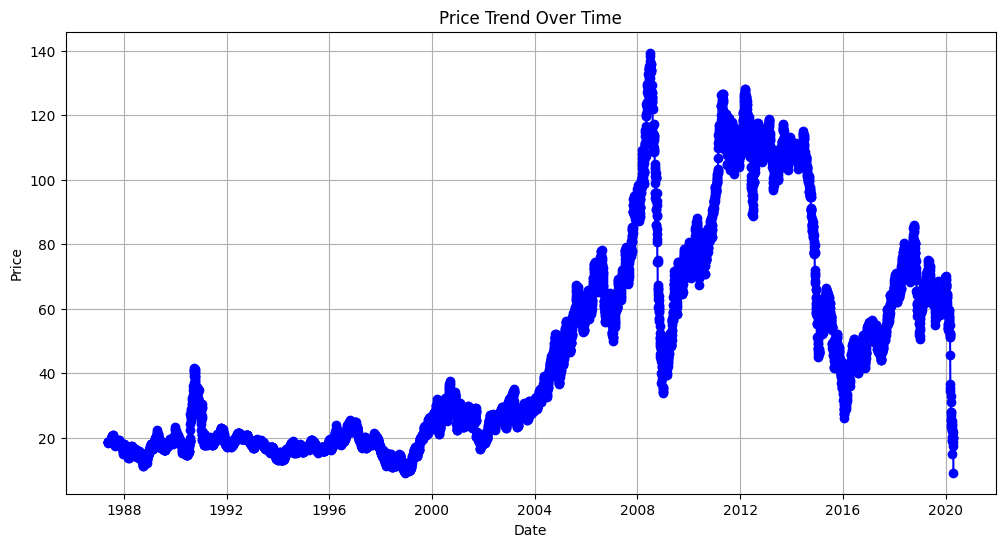

Price trend plotted successfully.


In [5]:
import matplotlib.pyplot as plt

def plot_price_trend(data: pd.DataFrame) -> None:
    """
    Plots the price trend over time.
    Parameters:
        data (pd.DataFrame): The preprocessed data with Date and Price columns.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Price'], color='blue', marker='o', linestyle='-')
    plt.title("Price Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()
    print("Price trend plotted successfully.")

plot_price_trend(preprocessed_data)


# Summary Statistics

Summary Statistics for Price:
count    8354.000000
mean       46.391099
std        32.415410
min         9.100000
25%        18.780000
50%        31.670000
75%        66.910000
max       139.380000
Name: Price, dtype: float64

Additional Statistics:
Median Price: 31.67
Price Variance: 1050.7588097105627
Price Standard Deviation: 32.41541006543898

Skewness of Price: 0.8696562638102158
Kurtosis of Price: -0.43664612431723127


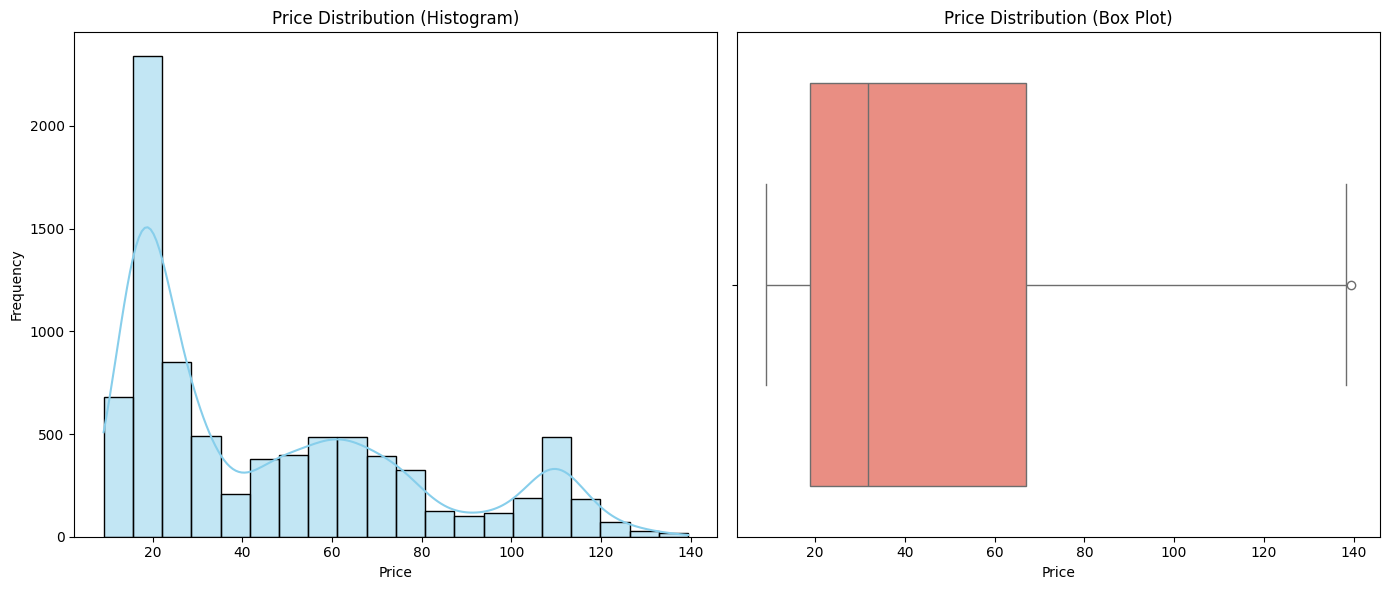

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def display_summary_statistics_with_graphs(data: pd.DataFrame) -> None:
    """
    Displays summary statistics and visualizes data distribution with a histogram and box plot for the Price column.
    
    Parameters:
        data (pd.DataFrame): The preprocessed data with Date and Price columns.
    """
    # Displaying summary statistics
    summary_stats = data['Price'].describe()
    print("Summary Statistics for Price:")
    print(summary_stats)

    # Additional statistics
    print("\nAdditional Statistics:")
    print(f"Median Price: {data['Price'].median()}")
    print(f"Price Variance: {data['Price'].var()}")
    print(f"Price Standard Deviation: {data['Price'].std()}")
    print(f"\nSkewness of Price: {data['Price'].skew()}")
    print(f"Kurtosis of Price: {data['Price'].kurtosis()}")

    # Plotting
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data['Price'], kde=True, color='skyblue', bins=20)
    plt.title('Price Distribution (Histogram)')
    plt.xlabel('Price')
    plt.ylabel('Frequency')

    # Box plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data['Price'], color='salmon')
    plt.title('Price Distribution (Box Plot)')
    plt.xlabel('Price')

    plt.tight_layout()
    plt.show()


display_summary_statistics_with_graphs(preprocessed_data)


# Autocorrelation Analysis for Price

<Figure size 1000x600 with 0 Axes>

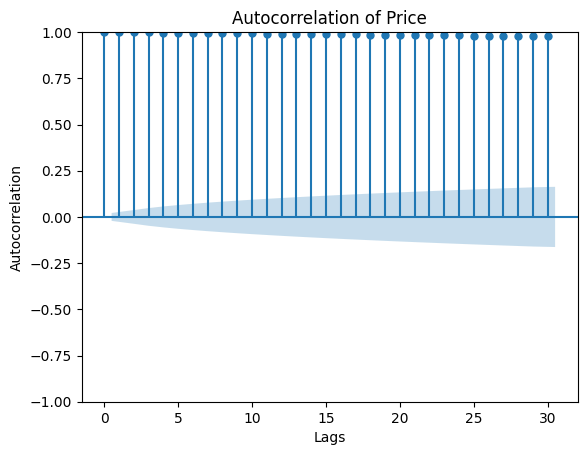

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

def plot_price_autocorrelation(data: pd.DataFrame, lags: int = 30) -> None:
    """
    Plots autocorrelation for the Price column to analyze time-based dependencies.
    
    Parameters:
        data (pd.DataFrame): The preprocessed data with Date and Price columns.
        lags (int): Number of lags for the autocorrelation plot.
    """
    plt.figure(figsize=(10, 6))
    plot_acf(data['Price'], lags=lags, title='Autocorrelation of Price')
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.show()

plot_price_autocorrelation(preprocessed_data)


# Trend and Seasonality Analysis

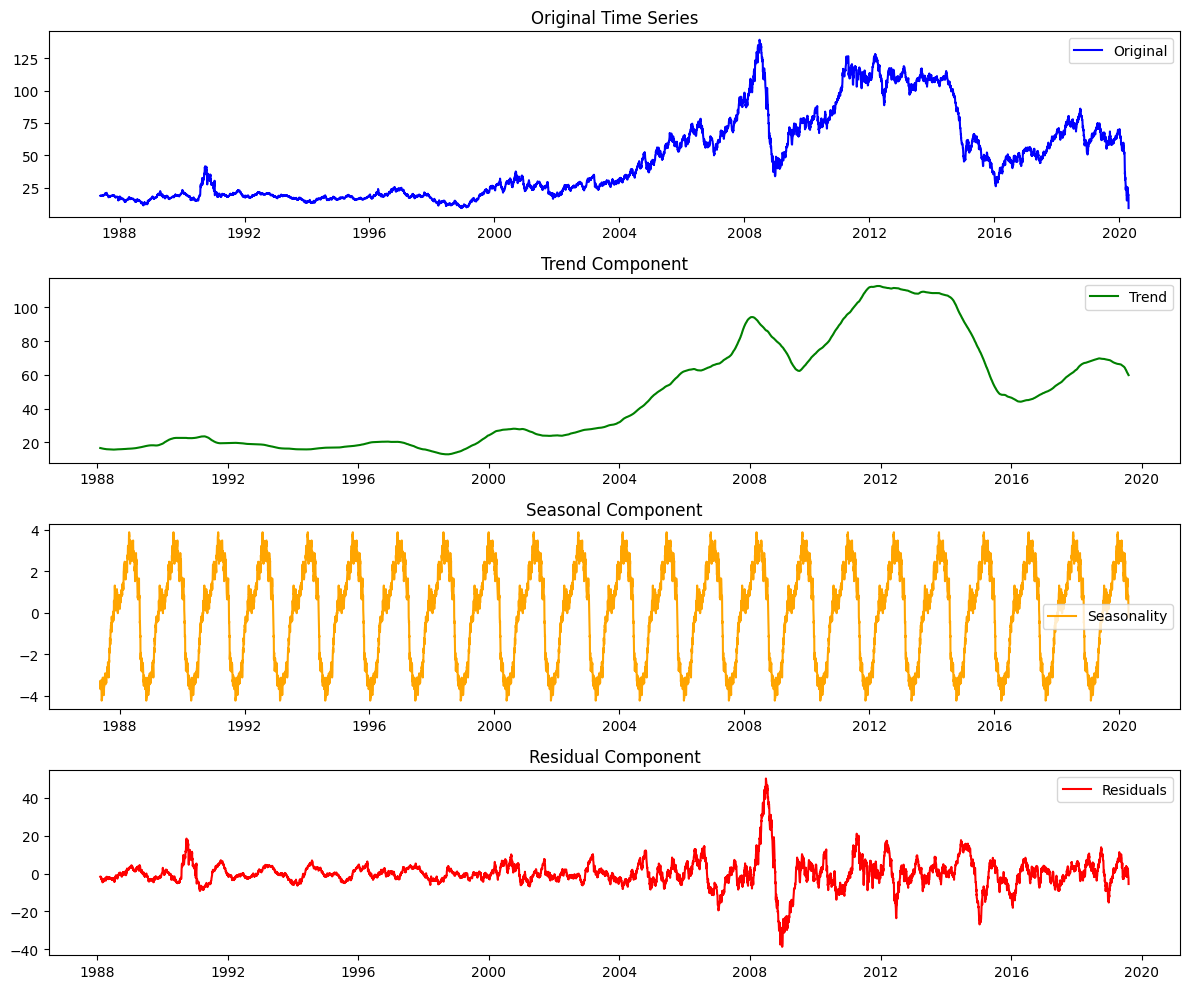

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_price_series(data: pd.DataFrame, model: str = 'additive', freq: int = 365) -> None:
    """
    Decomposes the Price series into trend, seasonal, and residual components and plots them.
    
    Parameters:
        data (pd.DataFrame): The preprocessed data with Date and Price columns.
        model (str): The type of decomposition to apply ('additive' or 'multiplicative').
        freq (int): The frequency of the seasonal component (e.g., 365 for daily data with yearly seasonality).
    """
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(data['Price'], model=model, period=freq)
    
    # Plot the decomposed components
    plt.figure(figsize=(12, 10))
    
    plt.subplot(4, 1, 1)
    plt.plot(data['Date'], data['Price'], label='Original', color='blue')
    plt.title('Original Time Series')
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(data['Date'], decomposition.trend, label='Trend', color='green')
    plt.title('Trend Component')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(data['Date'], decomposition.seasonal, label='Seasonality', color='orange')
    plt.title('Seasonal Component')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(data['Date'], decomposition.resid, label='Residuals', color='red')
    plt.title('Residual Component')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

decompose_price_series(preprocessed_data, model='additive', freq=365)


 # Forecasting with ARIMA Model

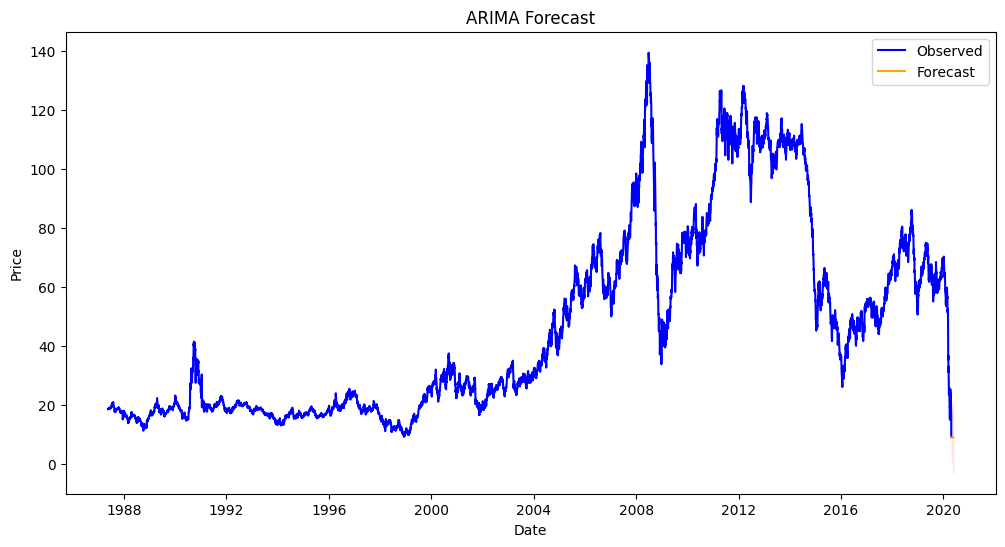

,Date,Forecasted_Price,Lower_CI,Upper_CI
8354,2020-04-22,8.910435,6.775288,11.045583
8355,2020-04-23,8.927872,5.868334,11.987411
8356,2020-04-24,8.926422,5.165806,12.687038
8357,2020-04-25,8.926542,4.576210,13.276874
8358,2020-04-26,8.926532,4.057404,13.795660


In [9]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

def arima_forecast(data: pd.DataFrame, order: tuple = (1, 1, 1), forecast_steps: int = 30) -> pd.DataFrame:
    """
    Fits an ARIMA model and forecasts future values.

    Parameters:
        data (pd.DataFrame): The preprocessed data with Date and Price columns.
        order (tuple): The (p, d, q) parameters for the ARIMA model.
        forecast_steps (int): Number of time steps to forecast into the future.

    Returns:
        pd.DataFrame: Forecasted values with dates.
    """
    # Fit ARIMA model
    model = ARIMA(data['Price'], order=order)
    arima_result = model.fit()

    # Forecast
    forecast = arima_result.get_forecast(steps=forecast_steps)
    forecast_index = pd.date_range(start=data['Date'].iloc[-1], periods=forecast_steps + 1, freq='D')[1:]
    forecast_values = forecast.predicted_mean

    # Confidence intervals
    conf_int = forecast.conf_int()

    # Plot forecast results
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Price'], label='Observed', color='blue')
    plt.plot(forecast_index, forecast_values, label='Forecast', color='orange')
    plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.title('ARIMA Forecast')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Return the forecasted values as a DataFrame
    forecast_df = pd.DataFrame({
        'Date': forecast_index,
        'Forecasted_Price': forecast_values,
        'Lower_CI': conf_int.iloc[:, 0],
        'Upper_CI': conf_int.iloc[:, 1]
    })
    return forecast_df

forecasted_data = arima_forecast(preprocessed_data, order=(1, 1, 1), forecast_steps=30)
forecasted_data.head()
